#PIP


In [ ]:
!pip install pmdarima
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


#Librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import tensorflow as tf
!pip install optuna
import optuna

#Cargar df y procesamiento


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Datami.xlsx')

In [ ]:
#dfl es solo para visualizar los valores de quantity anomalos
df = df[df['Quantity'] < 0]
df = df[df['Quantity'] >= -35]
df['Turnover'] = df['Turnover'].abs()
df['Quantity'] = df['Quantity'].abs()
df['qty'] = df['qty'].abs()

In [ ]:
df1=df.copy()
df1 = df1.groupby('date')['Turnover'].sum().reset_index()
df1 = df1.set_index('date')
df1.index
df1.sample(10)

,Turnover
date,
2022-09-17,8.443423e+06
2022-09-09,8.064883e+06
2023-11-01,1.931033e+07
2022-10-19,4.331021e+06
2023-02-20,1.465481e+07
2024-03-07,9.706334e+06
2023-08-27,2.023149e+07
2024-04-01,8.617153e+06
2023-01-26,1.322040e+07


In [ ]:
# Generar un rango de fechas completo entre la fecha de inicio y la fecha de término
rango_completo = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq='D')

# Identificar las fechas faltantes
fechas_faltantes = rango_completo.difference(df1.index)

# Mostrar resultados
if fechas_faltantes.empty:
    print("No hay fechas faltantes en la serie de tiempo.")
else:
    print(f"Hay {len(fechas_faltantes)} fechas faltantes en la serie de tiempo:")
    print(fechas_faltantes)
# Reindexar el DataFrame para incluir las fechas faltantes
df1 = df1.reindex(rango_completo)

# Interpolar los valores faltantes
df1['Turnover'] = df1['Turnover'].interpolate(method='time')

# Verificar si la interpolación fue exitosa
print("Valores interpolados:")
print(df1.loc[fechas_faltantes])

Hay 20 fechas faltantes en la serie de tiempo:
DatetimeIndex(['2022-07-28', '2022-07-30', '2022-07-31', '2022-08-06',
               '2022-08-07', '2022-08-08', '2022-09-04', '2022-09-18',
               '2022-09-19', '2022-12-25', '2023-01-01', '2023-04-07',
               '2023-05-01', '2023-05-07', '2023-09-18', '2023-09-19',
               '2023-12-17', '2023-12-25', '2024-01-01', '2024-05-01'],
              dtype='datetime64[ns]', freq=None)
Valores interpolados:
                Turnover
2022-07-28  6.776849e+05
2022-07-30  1.894627e+05
2022-07-31  9.497927e+04
2022-08-06  1.558146e+06
2022-08-07  1.039182e+06
2022-08-08  5.202168e+05
2022-09-04  9.945752e+06
2022-09-18  8.393511e+06
2022-09-19  8.343600e+06
2022-12-25  1.281784e+07
2023-01-01  1.552788e+07
2023-04-07  2.473150e+07
2023-05-01  1.846550e+07
2023-05-07  1.836453e+07
2023-09-18  1.112016e+07
2023-09-19  1.060048e+07
2023-12-17  1.902692e+07
2023-12-25  7.792526e+06
2024-01-01  7.446197e+06
2024-05-01  7.580971e+06


In [ ]:
df1

,Turnover
2022-07-26,3.319328e+03
2022-07-27,1.071424e+06
2022-07-28,6.776849e+05
2022-07-29,2.839462e+05
2022-07-30,1.894627e+05
...,...
2024-06-26,1.022596e+07
2024-06-27,1.003190e+07
2024-06-28,1.410025e+07
2024-06-29,2.672877e+07


#LightGBM

#Lightgbm1

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 3
[LightGBM] [Info] Start training from score 11773616.049544
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

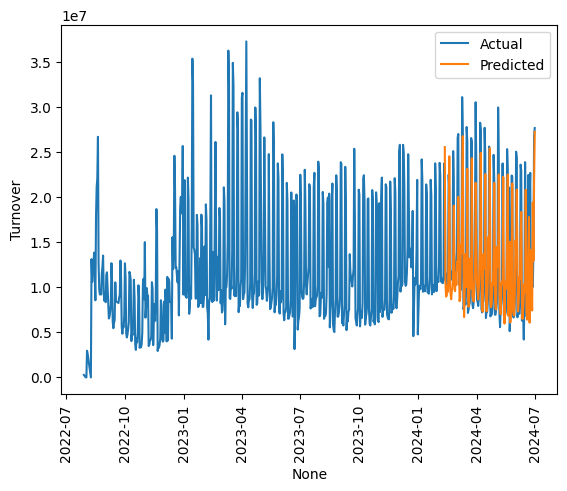

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame es df1 y que 'date' es el índice
# Ya que 'date' es el índice, no necesitas especificar 'date' como columna
df1 = df1.sort_index()

# Crear lags para la variable 'Turnover'
for lag in range(1, 4):  # Puedes ajustar el número de lags que quieras crear
    df1[f'Turnover_lag_{lag}'] = df1['Turnover'].shift(lag)

# Eliminar las filas con NaNs generadas por los lags
df1 = df1.dropna()

# Definir las características (features) y la variable objetivo (target)
cols = [col for col in df1.columns if col != 'Turnover']
X = df1[cols]
y = df1['Turnover']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(df1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Crear el dataset para LightGBM
lgbtrain = lgb.Dataset(data=X_train, label=y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_test, label=y_test, reference=lgbtrain, feature_name=cols)

# Definir los parámetros del modelo
lgb_params = {
    'num_leaves': 10,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
    'max_depth': 5,
    'verbosity': 1,
    'num_boost_round': 10000,
    'early_stopping_rounds': 200,
    'nthread': -1,
    'objective': 'regression'
}

# Función de evaluación personalizada
def mae_eval(y_pred, train_data):
    y_true = train_data.get_label()
    return 'mae', mean_absolute_error(y_true, y_pred), False

# Entrenar el modelo
model = lgb.train(lgb_params,
                  train_set=lgbtrain,
                  valid_sets=[lgbval],
                  feval=mae_eval)

# Realizar predicciones
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE on test data: {mae}')

# Agregar las predicciones al DataFrame original para visualización
df1.loc[df1.index[-len(y_pred_test):], 'preds'] = y_pred_test

# Visualizar los resultados
sns.lineplot(data=df1, x=df1.index, y='Turnover', label='Actual')
sns.lineplot(data=df1, x=df1.index, y='preds', label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.show()


##Lightgbm2

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 4
[LightGBM] [Info] Start training from score 13672802.553571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

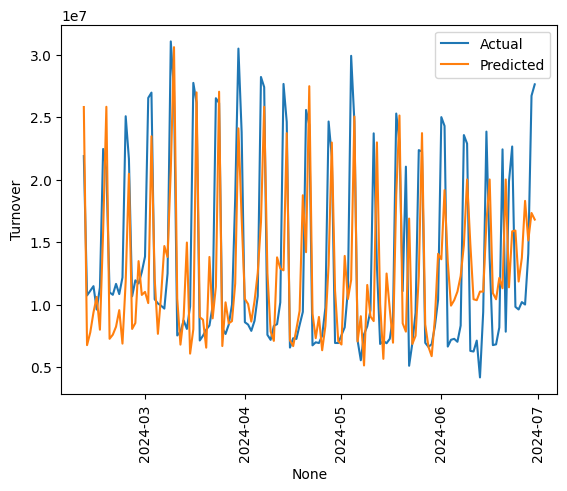

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame es df1 y que 'date' es el índice
# Ya que 'date' es el índice, no necesitas especificar 'date' como columna
df1 = df1.sort_index()

# Crear lags para la variable 'Turnover'
for lag in range(1, 4):  # Puedes ajustar el número de lags que quieras crear
    df1[f'Turnover_lag_{lag}'] = df1['Turnover'].shift(lag)

# Eliminar las filas con NaNs generadas por los lags
df1 = df1.dropna()

# Definir las características (features) y la variable objetivo (target)
cols = [col for col in df1.columns if col != 'Turnover']
X = df1[cols]
y = df1['Turnover']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(df1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Crear el dataset para LightGBM
lgbtrain = lgb.Dataset(data=X_train, label=y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_test, label=y_test, reference=lgbtrain, feature_name=cols)

# Definir los parámetros del modelo
lgb_params = {
    'num_leaves': 10,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
    'max_depth': 5,
    'verbosity': 1,
    'num_boost_round': 10000,
    'early_stopping_rounds': 200,
    'nthread': -1,
    'objective': 'regression'
}

# Función de evaluación personalizada para MAPE
def mape_eval(y_pred, train_data):
    y_true = train_data.get_label()
    return 'mape', mean_absolute_percentage_error(y_true, y_pred), False

# Entrenar el modelo
model = lgb.train(lgb_params,
                  train_set=lgbtrain,
                  valid_sets=[lgbval],
                  feval=mape_eval)

# Realizar predicciones
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluar el modelo
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'MAPE on test data: {mape}')

# Agregar las predicciones al DataFrame original para visualización
df1.loc[df1.index[-len(y_pred_test):], 'preds'] = y_pred_test

# Visualizar los resultados
sns.lineplot(data=df1, x=df1.index, y='Turnover', label='Actual')
sns.lineplot(data=df1, x=df1.index, y='preds', label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.show()


##Lightgbm3

[I 2024-08-26 06:04:47,558] A new study created in memory with name: no-name-7d73bf7b-cf67-4dc7-bd12-7e6da60745ab
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-08-26 06:04:47,889] Trial 0 finished with value: 0.5548847578471382 and parameters: {'num_leaves': 66, 'learning_rate': 0.27741010619446377, 'feature_fraction': 0.7983096801526481, 'max_depth': 3}. Best is trial 0 with value: 0.5548847578471382.
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-08-26 06:04:48,732] Trial 1 finished with value: 0.5388532550322351 and parameters: {'num_leaves': 22, 'learning_rate': 0.05799399696403287, 'feature_fraction': 0.6335241004149109,

Best params: {'num_leaves': 47, 'learning_rate': 0.06020143202070943, 'feature_fraction': 0.9251590257250343, 'max_depth': 8}
Best MAPE: 0.5122597619644268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 4
[LightGBM] [Info] Start training from score 13759265.592593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

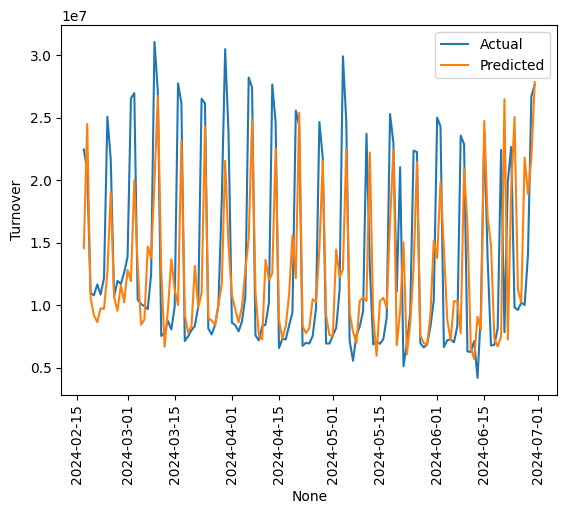

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

# Supongamos que tu DataFrame es df1 y que 'date' es el índice
df1 = df1.sort_index()

# Crear lags para la variable 'Turnover'
for lag in range(1, 4):
    df1[f'Turnover_lag_{lag}'] = df1['Turnover'].shift(lag)

# Eliminar las filas con NaNs generadas por los lags
df1 = df1.dropna()

# Definir las características (features) y la variable objetivo (target)
cols = [col for col in df1.columns if col != 'Turnover']
X = df1[cols]
y = df1['Turnover']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(df1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Crear el dataset para LightGBM
lgbtrain = lgb.Dataset(data=X_train, label=y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_test, label=y_test, reference=lgbtrain, feature_name=cols)

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'verbosity': -1,
        'objective': 'regression',
        'metric': 'None',  # Disable default metrics
        'nthread': -1,
        'num_boost_round': 10000,
        'early_stopping_rounds': 200
    }

    # Entrenar el modelo con los parámetros sugeridos
    model = lgb.train(param,
                      train_set=lgbtrain,
                      valid_sets=[lgbval],
                      feval=mape_eval)

    # Realizar predicciones en el conjunto de validación
    y_pred_val = model.predict(X_test, num_iteration=model.best_iteration)

    # Calcular el MAPE en el conjunto de validación
    mape = mean_absolute_percentage_error(y_test, y_pred_val)
    return mape

# Optimización de hiperparámetros con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros
print(f"Best params: {study.best_params}")
print(f"Best MAPE: {study.best_value}")

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params
best_params['objective'] = 'regression'
best_params['metric'] = 'None'  # Disable default metrics
best_params['nthread'] = -1
best_params['num_boost_round'] = 10000
best_params['early_stopping_rounds'] = 200

model = lgb.train(best_params,
                  train_set=lgbtrain,
                  valid_sets=[lgbval],
                  feval=mape_eval)

# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluar el modelo en el conjunto de prueba
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'MAPE on test data: {mape}')

# Agregar las predicciones al DataFrame original para visualización
df1.loc[df1.index[-len(y_pred_test):], 'preds'] = y_pred_test

# Visualizar los resultados
sns.lineplot(data=df1, x=df1.index, y='Turnover', label='Actual')
sns.lineplot(data=df1, x=df1.index, y='preds', label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.show()


##Lightgbm (mejor modelo pero se me olvido ponerlo en el informe)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 3
[LightGBM] [Info] Start training from score 11773616.049544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

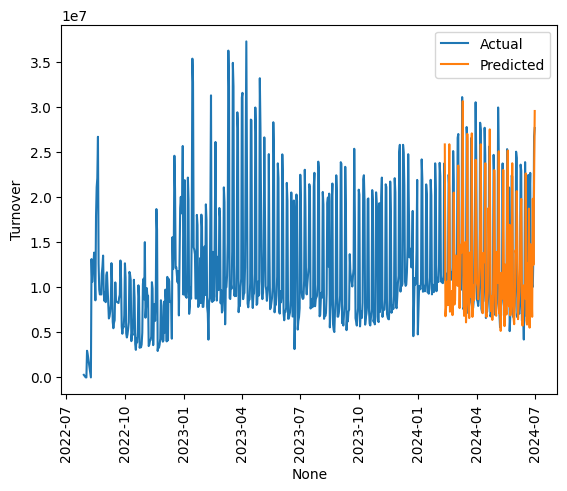

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame es df1 y que 'date' es el índice
df1 = df1.sort_index()

# Crear lags para la variable 'Turnover'
for lag in range(1, 4):  # Puedes ajustar el número de lags que quieras crear
    df1[f'Turnover_lag_{lag}'] = df1['Turnover'].shift(lag)

# Eliminar las filas con NaNs generadas por los lags
df1 = df1.dropna()

# Definir las características (features) y la variable objetivo (target)
cols = [col for col in df1.columns if col != 'Turnover']
X = df1[cols]
y = df1['Turnover']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(df1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Crear el modelo base de LightGBM
model = lgb.LGBMRegressor(objective='regression', n_jobs=-1)

# Definir el espacio de búsqueda (param_grid)
param_grid = {
    'num_leaves': [10, 20, 30, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.6, 0.8, 1.0],
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 500]
}

# Definir el scorer usando MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mape_scorer, cv=3, verbose=1, n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor MAPE obtenido
print(f"Best params: {grid_search.best_params_}")
print(f"Best MAPE: {-grid_search.best_score_}")

# Realizar predicciones en el conjunto de prueba usando el mejor modelo
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'MAPE on test data: {mape}')

# Agregar las predicciones al DataFrame original para visualización
df1.loc[df1.index[-len(y_pred_test):], 'preds'] = y_pred_test

# Visualizar los resultados
sns.lineplot(data=df1, x=df1.index, y='Turnover', label='Actual')
sns.lineplot(data=df1, x=df1.index, y='preds', label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.show()


#SARIMA


Error Cuadrático Medio: 13350079831912.504


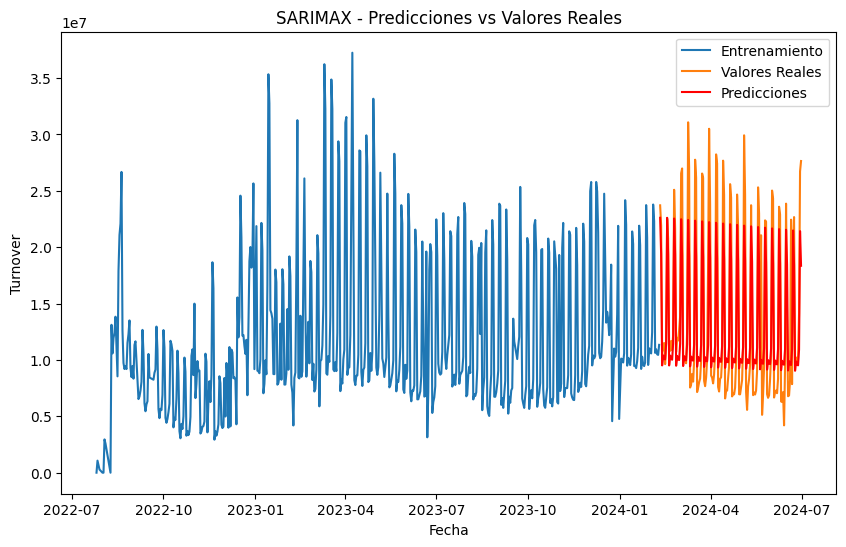

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Asegúrate de que tu DataFrame df1 esté correctamente indexado por fecha y ordenado
df1 = df1.sort_index()

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

# Ajustar el modelo SARIMAX
# order=(p,d,q) y seasonal_order=(P,D,Q,s) donde s es la estacionalidad
model = SARIMAX(train['Turnover'],
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Hacer predicciones
predictions = model_fit.forecast(steps=len(test))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test['Turnover'], predictions)
print(f'Error Cuadrático Medio: {mse}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Turnover'], label='Entrenamiento')
plt.plot(test.index, test['Turnover'], label='Valores Reales')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.title('SARIMAX - Predicciones vs Valores Reales')
plt.show()


Error Cuadrático Medio (MSE): 13350079831912.504
Error Porcentual Absoluto Medio (MAPE): 23.43%


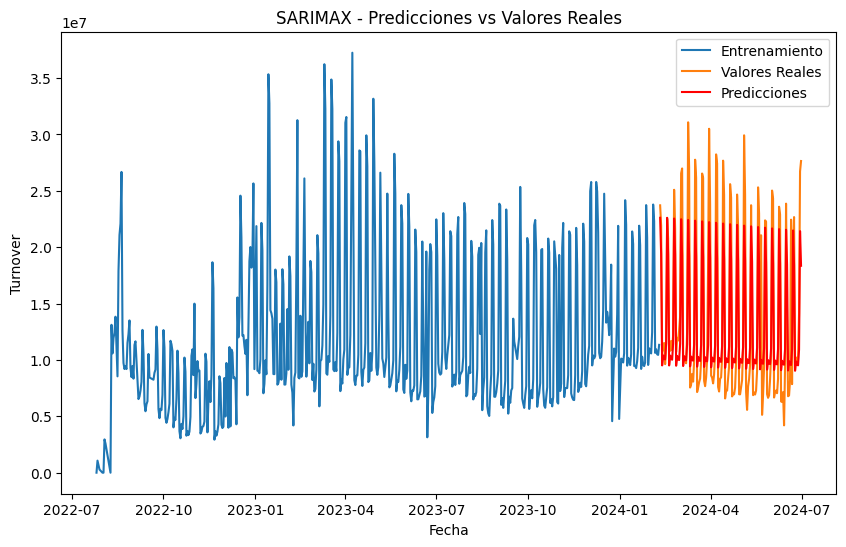

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Asegúrate de que tu DataFrame df1 esté correctamente indexado por fecha y ordenado
df1 = df1.sort_index()

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

# Ajustar el modelo SARIMAX
# order=(p,d,q) y seasonal_order=(P,D,Q,s) donde s es la estacionalidad
model = SARIMAX(train['Turnover'],
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Hacer predicciones
predictions = model_fit.forecast(steps=len(test))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test['Turnover'], predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(test['Turnover'], predictions)
print(f'Error Porcentual Absoluto Medio (MAPE): {mape * 100:.2f}%')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Turnover'], label='Entrenamiento')
plt.plot(test.index, test['Turnover'], label='Valores Reales')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.title('SARIMAX - Predicciones vs Valores Reales')
plt.show()


In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 0, 2, 2, 1, 0] before, using random point [1, 0, 1, 1, 0, 0]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 0, 2, 2, 1, 0] before, using random point [1, 0, 0, 0, 1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 0, 2, 1, 0] before, using random point [0, 0, 0, 2, 0, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 0, 2, 2, 1, 

Mejor conjunto de parámetros: p=0, d=1, q=0, P=1, D=1, Q=0
Mejor valor de MSE: 10312979222535.031
Error Porcentual Absoluto Medio (MAPE): 22.00%


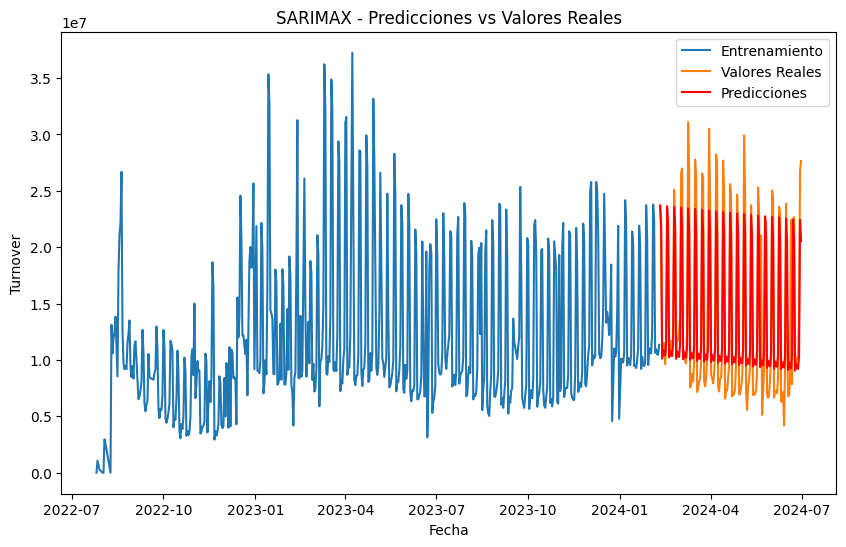

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer, Categorical

# Asegúrate de que tu DataFrame df1 esté correctamente indexado por fecha y ordenado
df1 = df1.sort_index()

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

# Definir la función objetivo para optimizar los parámetros de SARIMAX
def objective(params):
    p, d, q, P, D, Q = params

    # Ajustar el modelo SARIMAX
    model = SARIMAX(train['Turnover'],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, 7),  # Mantener la estacionalidad fija en 7
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Predecir y calcular el MSE en el conjunto de prueba
    predictions = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test['Turnover'], predictions)

    return mse

# Definir el espacio de búsqueda
space = [
    Integer(0, 2, name='p'),
    Integer(0, 1, name='d'),
    Integer(0, 2, name='q'),
    Integer(0, 2, name='P'),
    Integer(0, 1, name='D'),
    Integer(0, 2, name='Q')
]

# Realizar la optimización bayesiana
result = gp_minimize(objective, space, n_calls=50, random_state=0)

# Imprimir los mejores parámetros encontrados
best_params = result.x
print(f'Mejor conjunto de parámetros: p={best_params[0]}, d={best_params[1]}, q={best_params[2]}, P={best_params[3]}, D={best_params[4]}, Q={best_params[5]}')
print(f'Mejor valor de MSE: {result.fun}')

# Ajustar el modelo final con los mejores parámetros
model = SARIMAX(train['Turnover'],
                order=(best_params[0], best_params[1], best_params[2]),
                seasonal_order=(best_params[3], best_params[4], best_params[5], 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Hacer predicciones
predictions = model_fit.forecast(steps=len(test))

# Calcular el MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test['Turnover'] - predictions) / test['Turnover'])) * 100
print(f'Error Porcentual Absoluto Medio (MAPE): {mape:.2f}%')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Turnover'], label='Entrenamiento')
plt.plot(test.index, test['Turnover'], label='Valores Reales')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.title('SARIMAX - Predicciones vs Valores Reales')
plt.show()
